In [1]:
#Date: 17/07/2021
#Author: Vijay Kumar Mishra
#Task: Data Analytics
#Data: Demographic and Health Survey in Albania (DHS-VII, 2017-18)
#Data File name: ALKR71FL

In [1]:
# load some required packages used for data mining and related aspects
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as pit
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline

In [2]:
vkm_dhs= 'Downloads/ALKR71FL.dta'

In [3]:
vkm_dhs, meta=pyreadstat.read_dta("ALKR71FL.dta", apply_value_formats=True)

In [4]:
vkm_dhs.head()

,residence,maternal_edu,hh_wealth_index,wealth_index,sex,age,hw57,media,anc,birth_weight,maternal_education,anc_visit,haemoglobin_level,anemia
0,rural,higher,poorer,7451,male,26,mild,1.0,<4visits,4.1,20,0,107,yes
1,rural,secondary,middle,51454,male,38,severe,1.0,<4visits,3.5,16,0,66,yes
2,urban,primary,poorest,-88388,female,35,moderate,1.0,<4visits,0.0,8,0,95,yes
3,rural,higher,poorest,-75853,female,49,not anemic,1.0,=>4 visits,3.4,20,0,113,no
4,urban,higher,richer,103258,male,20,not anemic,1.0,<4visits,3.0,18,0,120,no


In [5]:
vkm_dhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wealth_index,1958.0,-21850.156282,103757.367856,-499200.0,-86000.75,-13557.0,55510.0,240184.0
age,1958.0,32.542901,15.275295,6.0,20.00,32.0,46.0,59.0
media,1958.0,0.929520,0.256020,0.0,1.00,1.0,1.0,1.0
birth_weight,1958.0,3.184254,0.760501,0.0,3.00,3.3,3.6,6.0
maternal_education,1958.0,11.684372,5.024159,0.0,8.00,8.0,16.0,21.0
anc_visit,1958.0,4.328396,3.713682,0.0,0.00,4.0,7.0,20.0
haemoglobin_level,1958.0,114.883555,12.511404,20.0,108.00,115.0,123.0,160.0


In [6]:
vkm_dhs.info()
vkm_dhs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   residence           1958 non-null   category
 1   maternal_edu        1958 non-null   category
 2   hh_wealth_index     1958 non-null   category
 3   wealth_index        1958 non-null   int64   
 4   sex                 1958 non-null   category
 5   age                 1958 non-null   int64   
 6   hw57                1958 non-null   category
 7   media               1958 non-null   float64 
 8   anc                 1958 non-null   category
 9   birth_weight        1958 non-null   float64 
 10  maternal_education  1958 non-null   int64   
 11  anc_visit           1958 non-null   int64   
 12  haemoglobin_level   1958 non-null   int64   
 13  anemia              1958 non-null   category
dtypes: category(7), float64(2), int64(5)
memory usage: 121.5 KB


(1958, 14)

In [17]:
#cross-tab, frequnecy ditributiion 

pd.crosstab(vkm_dhs['maternal_edu'],vkm_dhs['anemia'])

anemia,no,yes
maternal_edu,,
higher,303,75
no education,12,8
primary,756,345
secondary,344,115


In [19]:
#cross-tab, frequnecy ditributiion 
pd.crosstab(vkm_dhs['sex'],vkm_dhs['anemia'])

anemia,no,yes
sex,,
female,697,246
male,718,297


In [75]:
vkm_dhs['anemia'].value_counts()

no     1415
yes     543
Name: anemia, dtype: int64

In [16]:
#543,children (<60 months) are anemic

#1415,children (<60 months) aren't anemic

In [76]:
#average age of child(in months)
avg=vkm_dhs['age'].mean()

avg

32.54290091930542

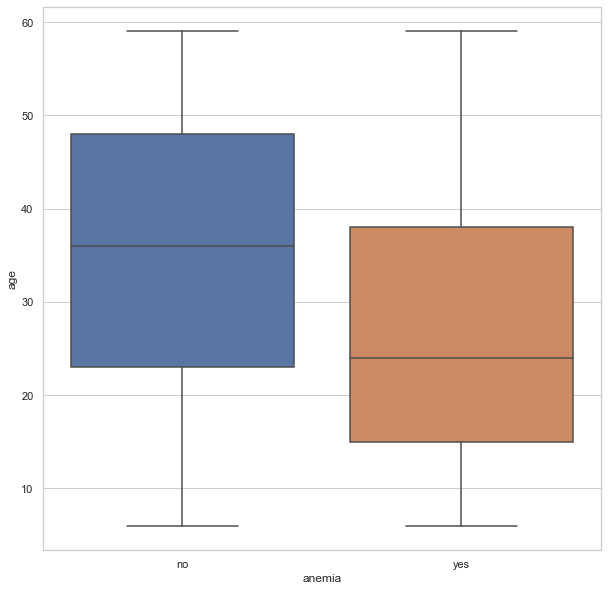

In [22]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,10))

boxplot_vkm=sns.boxplot(x='anemia', y='age', data=vkm_dhs, orient='v')

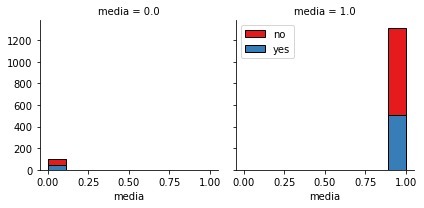

In [52]:
bins = np.linspace(vkm_dhs.media.min(), vkm_dhs.media.max(), 10)
g = sns.FacetGrid(vkm_dhs, col="media", hue="anemia", palette="Set1", col_wrap=2)
g.map(plt.hist, 'media', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

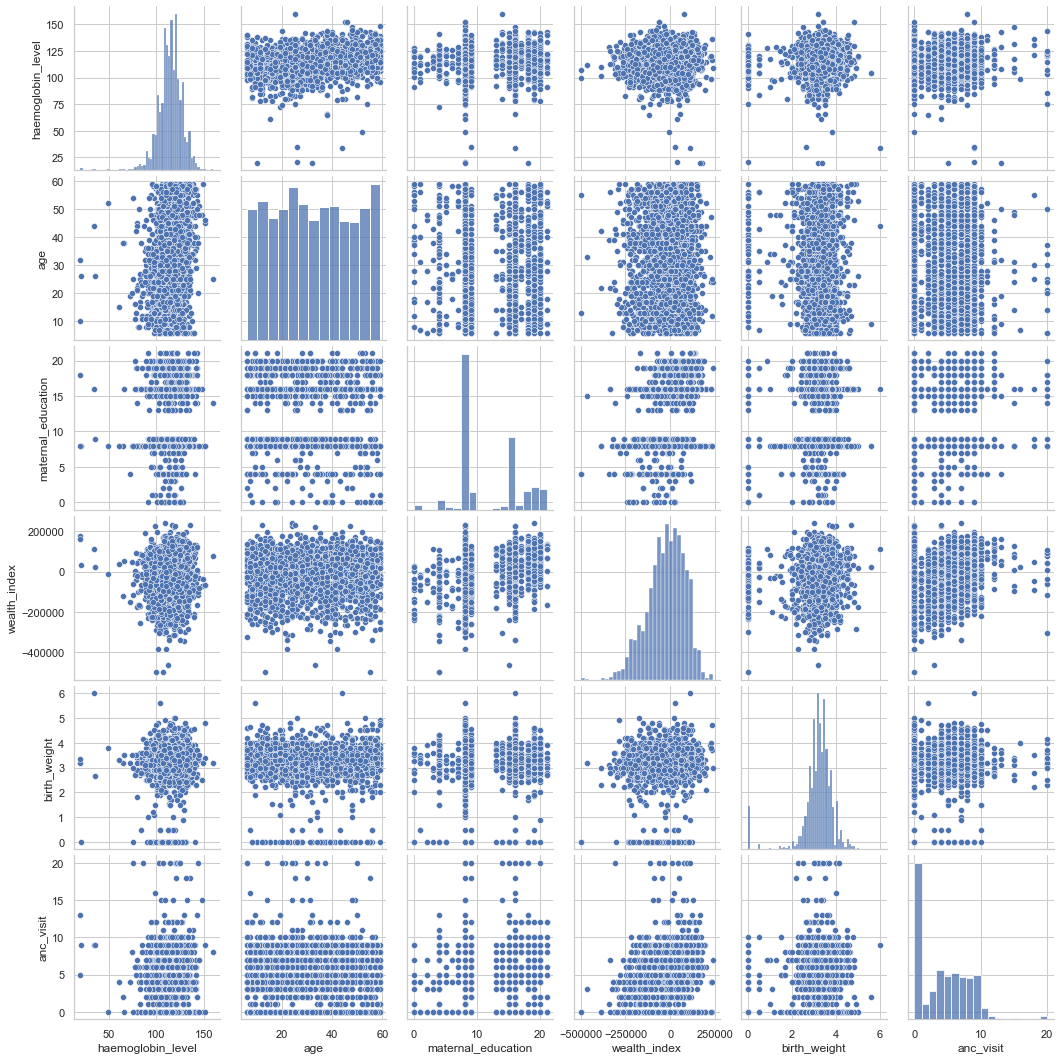

In [23]:
sns.pairplot(vkm_dhs[['haemoglobin_level', 'age', 'maternal_education','wealth_index', 'birth_weight', 'anc_visit']])

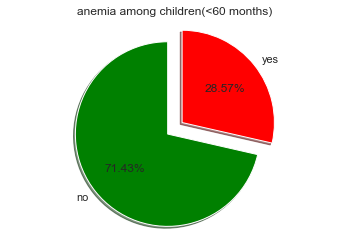

In [26]:
import matplotlib.pyplot as plt

labels=['no', 'yes']
colors=['green', 'red']
sizes=[1500, 600]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('anemia among children(<60 months)')
plt.axis('equal')
plt.show()

<AxesSubplot:>

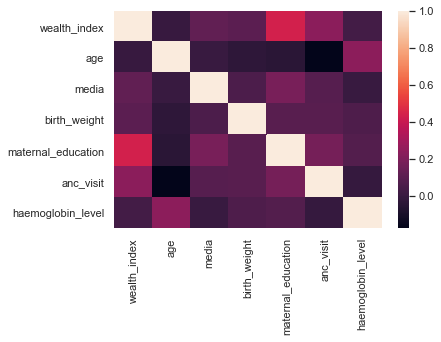

In [36]:
sns.heatmap(vkm_dhs.corr())

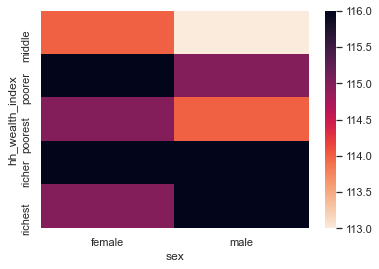

In [29]:
cross = pd.crosstab(index=vkm_dhs['hh_wealth_index'],
                    columns=vkm_dhs['sex'],
                    values=vkm_dhs['haemoglobin_level'],
                    aggfunc=np.mean).round(0)
sns.heatmap(cross, cmap='rocket_r', annot=False, fmt='g');

In [32]:
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

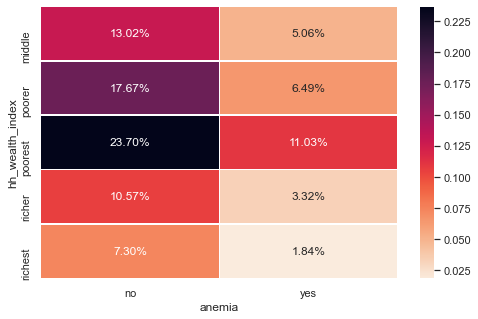

In [40]:
ross = pd.crosstab(vkm_dhs['anemia'], vkm_dhs['hh_wealth_index'], normalize='columns')
plot_heatmap(cross, fmt='.2%')

In [41]:
pd.crosstab(index=vkm_dhs['hh_wealth_index'],
            columns=vkm_dhs['anemia'],
            margins=True,
            margins_name='Total Percentage',
            normalize=True)

anemia,no,yes,Total Percentage
hh_wealth_index,,,
middle,0.130235,0.050562,0.180797
poorer,0.176711,0.064862,0.241573
poorest,0.236977,0.110317,0.347293
richer,0.105720,0.033197,0.138917
richest,0.073034,0.018386,0.091420
Total Percentage,0.722676,0.277324,1.000000


<AxesSubplot:>

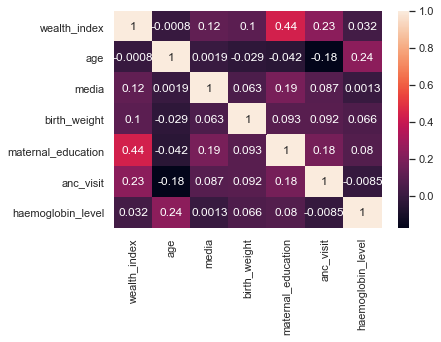

In [67]:
sns.heatmap(vkm_dhs.corr(), annot=True)

In [ ]:
vkm_dhs['anemia'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
vkm_dhs.head()

In [48]:
vkm_dhs.groupby(['education'])['anemia'].value_counts(normalize=True)

v106          v463f
higher        0        0.992866
              1        0.007134
no education  0        0.953000
              1        0.047000
primary       0        0.964252
              1        0.035748
secondary     0        0.980776
              1        0.019224
Name: v463f, dtype: float64

In [49]:
#hot encoding to convert categorical variables into dichotomous/binary and appending them to featured data set

In [34]:
feature_vk = vkm_dhs[['age','media','maternal_education','hh_wealth_index','anc', 'birth_weight']]
feature_vk = pd.concat([feature_vk,pd.get_dummies(vkm_dhs['hh_wealth_index'])], axis=1)
feature_vk = pd.concat([feature_vk,pd.get_dummies(vkm_dhs['anc'])], axis=1)
feature_vk.head()

,age,media,maternal_education,hh_wealth_index,anc,birth_weight,middle,poorer,poorest,richer,richest,<4visits,=>4 visits
0,26,1.0,20,poorer,<4visits,4.1,0,1,0,0,0,1,0
1,38,1.0,16,middle,<4visits,3.5,1,0,0,0,0,1,0
2,35,1.0,8,poorest,<4visits,0.0,0,0,1,0,0,1,0
3,49,1.0,20,poorest,=>4 visits,3.4,0,0,1,0,0,0,1
4,20,1.0,18,richer,<4visits,3.0,0,0,0,1,0,1,0


In [35]:
feature_vk.drop(['hh_wealth_index', 'anc', 'poorer', 'poorest', 'richer' ], axis = 1,inplace=True)

In [36]:
feature_vk.head()

,age,media,maternal_education,birth_weight,middle,richest,<4visits,=>4 visits
0,26,1.0,20,4.1,0,0,1,0
1,38,1.0,16,3.5,1,0,1,0
2,35,1.0,8,0.0,0,0,1,0
3,49,1.0,20,3.4,0,0,0,1
4,20,1.0,18,3.0,0,0,1,0


In [56]:
#define feature data set

In [37]:
vkm=feature_vk
vkm[0:5]

,age,media,maternal_education,birth_weight,middle,richest,<4visits,=>4 visits
0,26,1.0,20,4.1,0,0,1,0
1,38,1.0,16,3.5,1,0,1,0
2,35,1.0,8,0.0,0,0,1,0
3,49,1.0,20,3.4,0,0,0,1
4,20,1.0,18,3.0,0,0,1,0


In [ ]:
vkm_dhs['anemia'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
vkm_dhs.head()

In [39]:
vk=vkm_dhs['anemia'].values
vk[0:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [40]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(vkm_train, vk_train)

LogisticRegression()

In [14]:
#normalize the data set
#data standardization provides data zero mean and unit variance (ideally should be performed after train test split)

vkm=preprocessing.StandardScaler().fit(vkm).transform(vkm)
vkm[0:5]

array([[-0.42844163,  0.2753619 ,  1.20444348,  2.04447895, -1.1334523 ,
        -0.55335715, -0.46978533,  1.77187327, -0.72943908, -0.4016573 ,
        -0.31720392,  1.00409418, -1.00409418],
       [ 0.35734126,  0.2753619 ,  0.41528807, -0.48912218, -1.1334523 ,
         1.80715113,  2.12863182, -0.56437445, -0.72943908, -0.4016573 ,
        -0.31720392,  1.00409418, -1.00409418],
       [ 0.16089553,  0.2753619 , -4.18811924, -0.48912218,  0.88226033,
        -0.55335715, -0.46978533, -0.56437445,  1.3709164 , -0.4016573 ,
        -0.31720392,  1.00409418, -1.00409418],
       [ 1.07764223,  0.2753619 ,  0.28376227,  2.04447895, -1.1334523 ,
        -0.55335715, -0.46978533, -0.56437445,  1.3709164 , -0.4016573 ,
        -0.31720392, -0.99592251,  0.99592251],
       [-0.82133307,  0.2753619 , -0.24234155,  2.04447895, -1.1334523 ,
        -0.55335715, -0.46978533, -0.56437445, -0.72943908,  2.4896846 ,
        -0.31720392,  1.00409418, -1.00409418]])

In [60]:
# train test splitting of data

In [46]:
from sklearn.model_selection import train_test_split

vkm_train, vkm_test, vk_train, vk_test = train_test_split( vkm, vk, test_size=0.2, random_state=4)
print ('Train set:', vkm_train.shape,  vk_train.shape)
print ('Test set:', vkm_test.shape,  vk_test.shape)

vkm_train.shape, vk_train.shape

Train set: (1566, 8) (1566,)
Test set: (392, 8) (392,)


((1566, 8), (1566,))

In [47]:
vkm=preprocessing.StandardScaler().fit(vkm).transform(vkm)
vkm[0:5]

array([[-0.42844163,  0.2753619 ,  1.65555108,  1.20444348, -0.46978533,
        -0.31720392,  1.00409418, -1.00409418],
       [ 0.35734126,  0.2753619 ,  0.85919461,  0.41528807,  2.12863182,
        -0.31720392,  1.00409418, -1.00409418],
       [ 0.16089553,  0.2753619 , -0.73351833, -4.18811924, -0.46978533,
        -0.31720392,  1.00409418, -1.00409418],
       [ 1.07764223,  0.2753619 ,  1.65555108,  0.28376227, -0.46978533,
        -0.31720392, -0.99592251,  0.99592251],
       [-0.82133307,  0.2753619 ,  1.25737284, -0.24234155, -0.46978533,
        -0.31720392,  1.00409418, -1.00409418]])

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(vkm_train, vk_train)

C:\Users\VijayKumarMishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
vk_pred = lr_model.predict(vkm_test)

In [21]:
vk_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [50]:
p= pd.DataFrame({'Actual value': vk_test, 'Predicted value':vk_pred})
p.head()

,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [13]:
# train data set

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(vk_train,vkm_train)
result=logit_model.fit()
print(result.summary2())

In [54]:
#model fitting 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vkm_train, vkm_test, vk_train, vk_test = train_test_split(vkm, vk, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(vkm_train, vk_train)

LogisticRegression()

In [55]:
vk_pred = logreg.predict(vkm_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(vkm_test, vk_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(vk_test, vk_pred)
print(confusion_matrix)

[[419   7]
 [153   9]]


              precision    recall  f1-score   support

           0       0.73      0.98      0.84       426
           1       0.56      0.06      0.10       162

    accuracy                           0.73       588
   macro avg       0.65      0.52      0.47       588
weighted avg       0.69      0.73      0.64       588



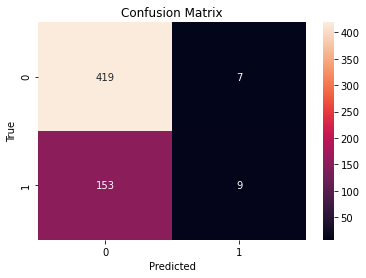

In [57]:
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(vk_test, vk_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(vk_test, vk_pred))

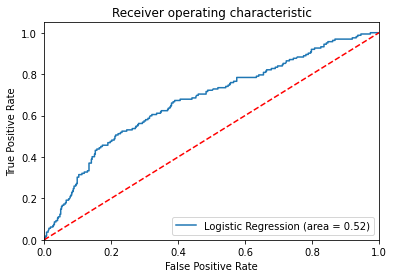

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(vk_test, logreg.predict(vkm_test))
fpr, tpr, thresholds = roc_curve(vk_test, logreg.predict_proba(vkm_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Ks = 7
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];

for n in range(1, Ks):
  neigh = KNeighborsClassifier(n_neighbors=n).fit(vkm_train, vk_train)
  yhat = neigh.predict(vkm_test)
  mean_acc[n-1] = metrics.accuracy_score(vk_test, yhat)
  std_acc[n-1] = np.std(yhat==vk_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
bestK = mean_acc.argmax()+1
print('Best Accuracy K is ', bestK)
print('Max Accuracy is', mean_acc.max())

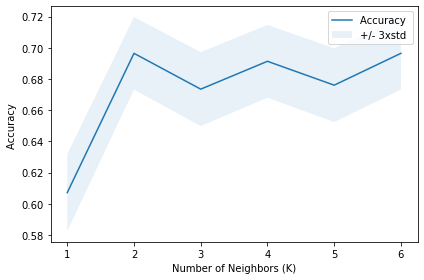

The best accuracy was with 0.6964285714285714 with k= 2


In [15]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(vkm_train, vk_train)

In [ ]:
from sklearn.metrics import f1_score

from sklearn.metrics import jaccard_similarity_score

neigh = KNeighborsClassifier(n_neighbors = 7).fit(vkm_train,vk_train)

yhat=neigh.predict(vkm_test)
print("F1-SCORE:: ",f1_score( vk_test, yhat, average='weighted'))
print("JACCARD SIMILARITY SCORE:: ",jaccard_score(vk_test, yhat))

In [16]:
#spliting data into train and test_for Decision_Tree____vkm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data
vkm_train, vkm_test, vk_train, vk_test = train_test_split(vkm, vk, test_size=0.2, random_state=2)

print('vkm_train.shape is', vkm_train.shape, 'vk_train.shape is', vk_train.shape)

vkm_train.shape is (1566, 13) vk_train.shape is (1566,)


In [17]:
#tree load___vkm
anemiaTree = DecisionTreeClassifier(criterion="entropy")

anemiaTree

DecisionTreeClassifier(criterion='entropy')

In [18]:
#model fit___vkm

anemiaTree.fit(vkm_train,vk_train)

predTree = anemiaTree.predict(vkm_test)

In [19]:
#Decision accuracy___vkm

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(vk_test, predTree))

DecisionTree's Accuracy:  0.6045918367346939


In [ ]:
from sklearn.metrics import jaccard_score

print("Decision Tree's jaccard_score is" ,jaccard_score( vk_test, predTree))

In [20]:
#fi_ score___vkm

from sklearn.metrics import f1_score

print("Decision Tree's fi_score is" ,f1_score( vk_test, predTree, average='weighted'))

Decision Tree's fi_score is 0.6040197417095747


In [83]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
##visualization_DT___vkm###
import sklearn 
from six import StringIO
from sklearn import tree
import pydotplus
import graphviz
import matplotlib.image as mpimg

%matplotlib inline

dot_data = StringIO()
filename = "Dtree.png"
featureNames = feature_vk.columns[:]
targetNames = vkm_dhs["anemia"].unique().tolist()
out=tree.export_graphviz(anemiaTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(vk_train), filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')